In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,4]

In [2]:
#I'm defining a function to help visualize cash flows
#This might be a little advanced so don't stress trying to understand it if you don't get it
def timelinePlot(periods):
    #Create our plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax)

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5)
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
    #Get rid of axes
    plt.axis('off')
    plt.show()

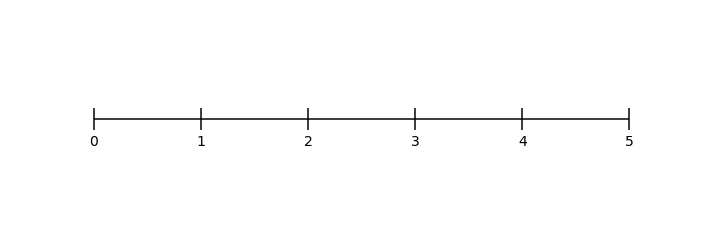

In [3]:
#Now let's call our helper function to see what a timeline for a 5 year period looks like
timelinePlot(5)

In [4]:
def timelinePlot(periods,value):
    #Create our plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax)

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5)
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
    #Get rid of axes
    plt.axis('off')
    
    #Plot a red dot on the year that our value is at
    plt.plot(positions[value[1]],y, 'ro', ms = 15, mfc = 'r')
    
    #Plot the value above, use rounding to keep it clean
    plt.text(positions[value[1]], y+1.2, "$"+str(round(value[0],1)), horizontalalignment='center',fontsize=18)

    
    plt.show()

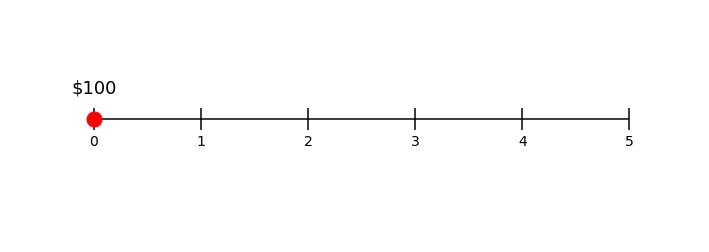

In [5]:
timelinePlot(5,(100,0))

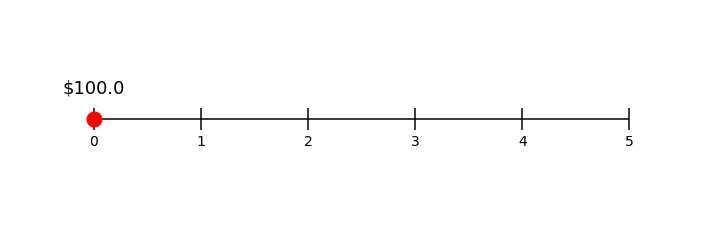

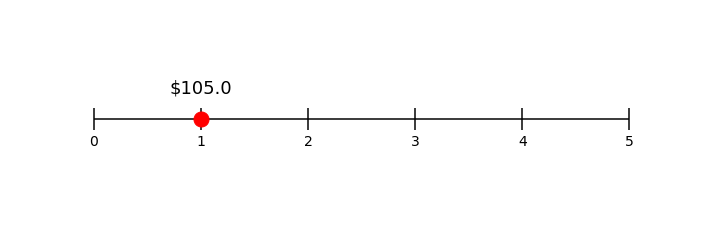

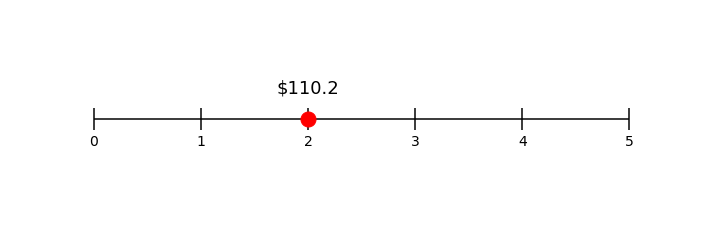

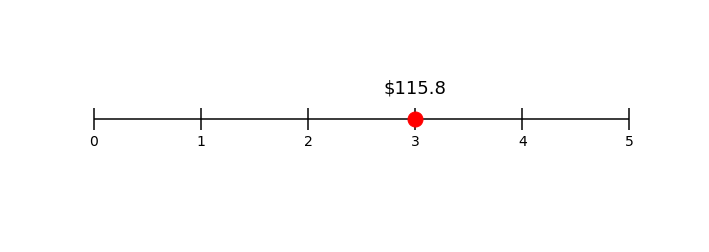

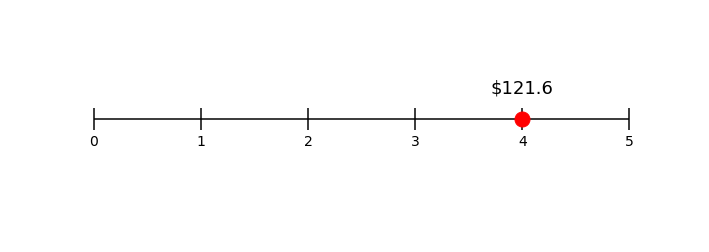

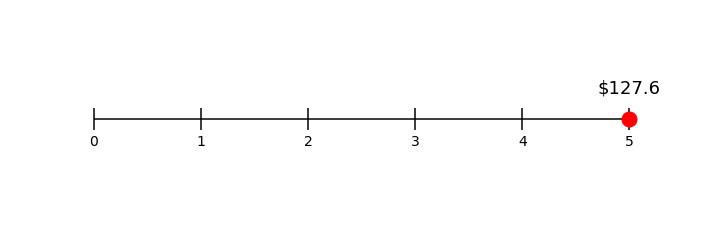

In [6]:
#As we learned before, we can get compounding returns, let's see how that works by iterating through the process
#on the timeline
periods = 5
principal = 100
r = .05
for t in range(periods+1):
    A = principal*(1+r)**t
    timelinePlot(periods,(A,t))

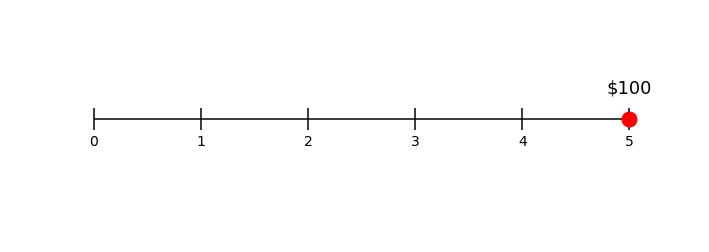

In [7]:
#Now the question is, what is $100 in 5 years worth to us today
#On the graph it looks like this
timelinePlot(5,(100,5))

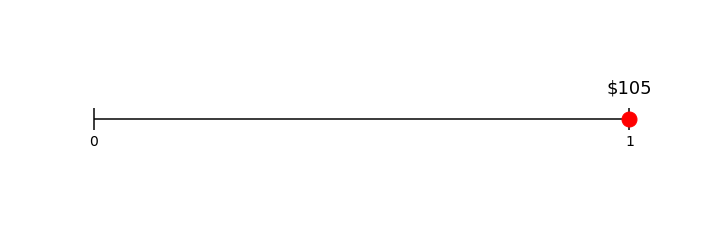

In [8]:
#What we do to figure this out is the reverse of compound interest
#So let's start with a simpler problem, just one period and 105 dollars in a year
timelinePlot(1,(105,1))

In [9]:
#Now let's say we had $100 to invest, either with the bank where we get a return of 10%
#or buying a bond for $100 and getting $105 in the future
#Either way, let's think about it in terms of investing

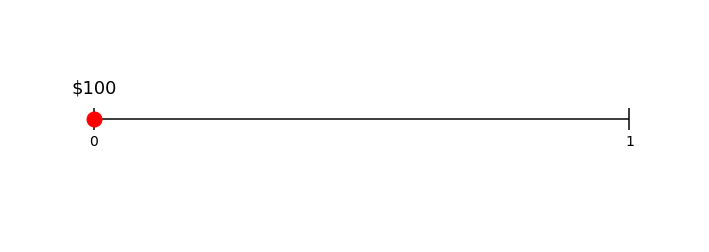

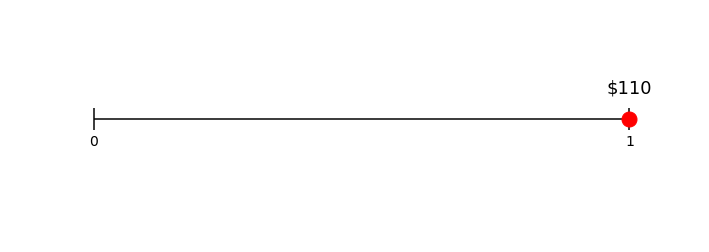

In [10]:
#With the bank, we have 100 at period 0 and 110 at period 1
timelinePlot(1,(100,0))
timelinePlot(1,(110,1))

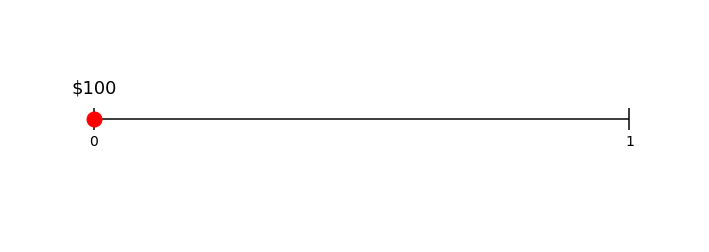

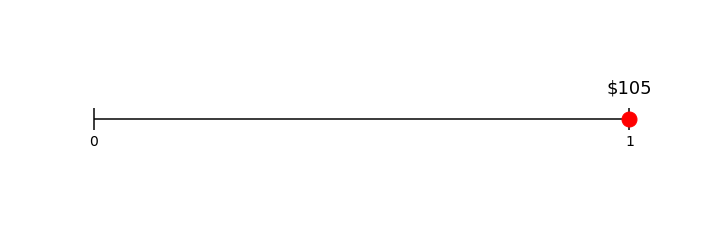

In [11]:
#With the bond, we have 100 at period 0, but only 105 at period 1
timelinePlot(1,(100,0))
timelinePlot(1,(105,1))
#So we see the better deal as the bank

In [12]:
#So the question is, what would we want to pay for the bond to make us feel justified in buying it
#We would expect a return of 10%
#Meaning we want this...
price = 105/1.1
print(price)

95.45454545454545


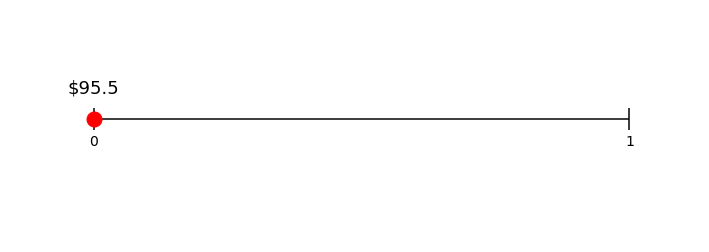

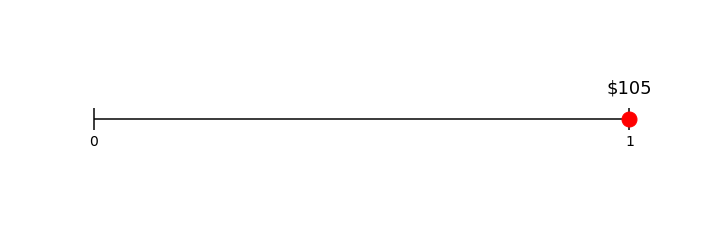

In [13]:
timelinePlot(1,(105/1.1,0))
timelinePlot(1,(105,1))
#Now this we would agree to possibly
#And we also would put away the extra $4.5 in the bank, meaning we end up with $110 still

In [14]:
#Now I will change the function to take multiple inputs
#We want to begin modeling our investment decisions as cashflows where we have negative cashflows
#for investing and positive for the returns
def timelinePlot(periods,values):
    #Create our plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax)

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5)
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
    #Get rid of axes
    plt.axis('off')
    
    for value in values:
        #Plot a red dot on the year that our value is at
        plt.plot(positions[value[1]],y, 'ro', ms = 15, mfc = 'r')
        #Plot the values above, use rounding to keep it clean
        plt.text(positions[value[1]], y+1.2, "$"+str(round(value[0],1)), horizontalalignment='center',fontsize=18)

    
    plt.show()

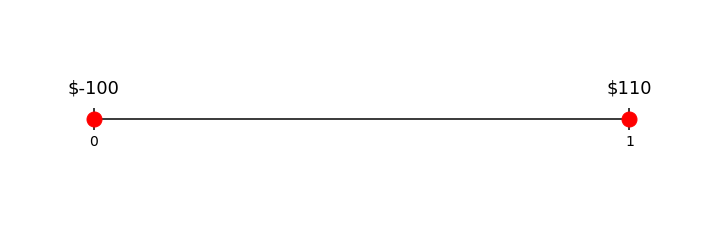

In [15]:
#So the bank decision now looks like this
timelinePlot(1,[(-100,0),(110,1)])

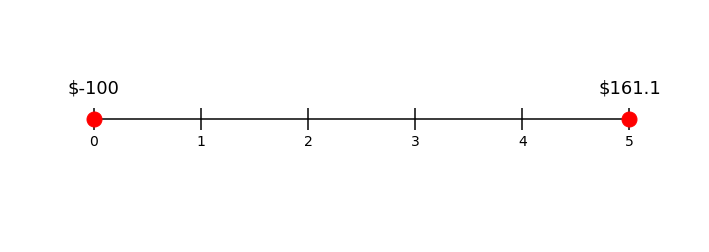

In [16]:
#Or, if we had 5 periods of compounding
timelinePlot(5,[(-100,0),(100*(1.1)**5,5)])
#Notice there are no points in between because we do not take our money out until the 5th year

In [17]:
#Now let's say we have a bond that will give us $100 dollars in 3 years and r=.05
PV = 100/(1.05)**3
print(PV)

86.3837598531476


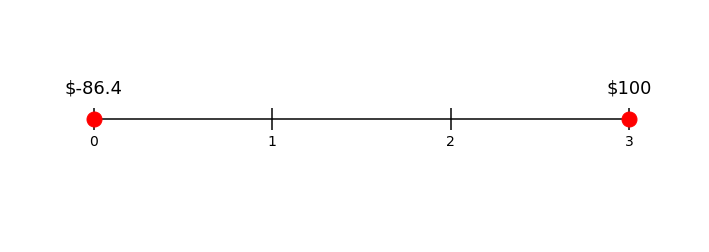

In [18]:
timelinePlot(3,[(-100/(1.05)**3,0),(100,3)])

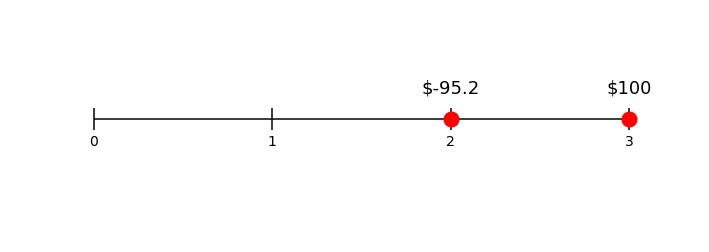

In [19]:
#Now here's a tricky question, what if we want sign a deal where at time 2 we pay for a bond and time 3 we get $100
#The trick here is that the time periods we aren't investing our money in we don't care about
#So we would only divide by one year
timelinePlot(3,[(-100/(1.05)**1,2),(100,3)])

In [20]:
#Now you might ask, what do we do during those two years that we are waiting for the deal?
#We could invest in the bank or another bond that pays us at time 2
#So we would be investing twice
#But how much would we need to be able to buy the bond at time 2?
#We would need to have invested enough during two years to have $95.2
print(95.2/(1.05)**2)

86.34920634920636


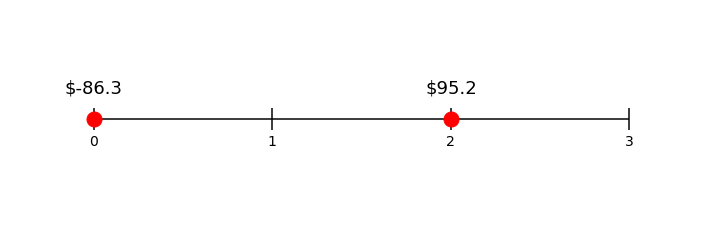

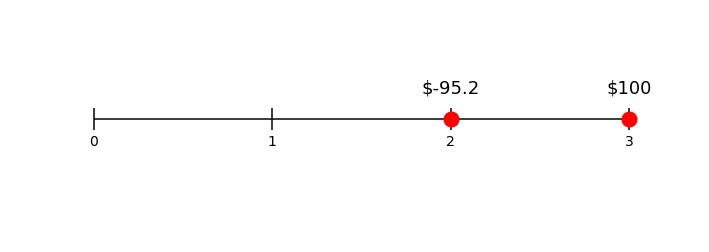

In [21]:
#So our two investment decisions would look like this
timelinePlot(3,[(-95.2/(1.05)**2,0),(95.2,2)])
timelinePlot(3,[(-100/(1.05)**1,2),(100,3)])

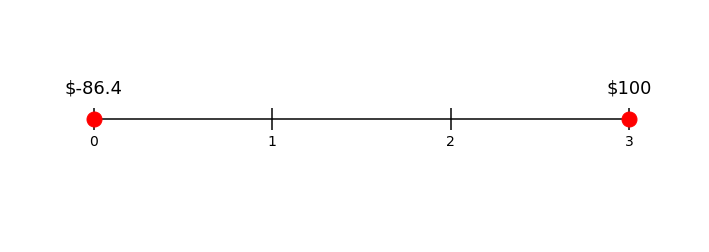

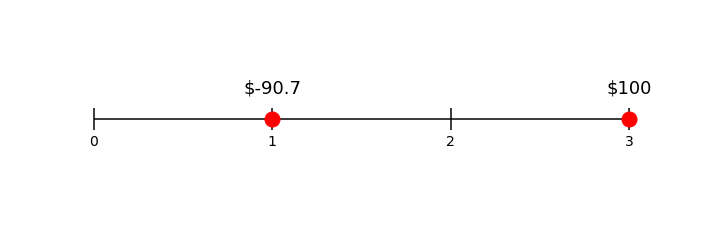

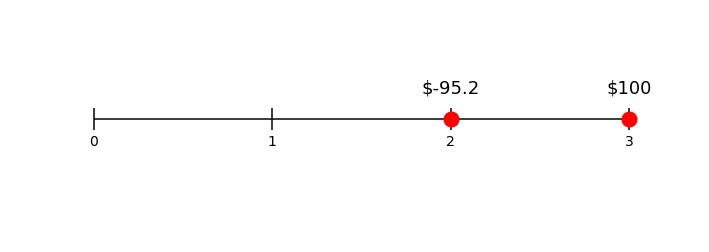

In [22]:
#When we invest does not matter for present value, it is how long we invest
#So let's work backwards now from our $100 bond to see how much we would invest in it at each time
#How much we would invest during each period is its value in that period
for x in range(3):
    #Define how long we would have to be invested for
    time = 3-x
    timelinePlot(3,[(-100/(1.05)**time,x),(100,3)])

In [23]:
#Present value is the value of a future cash flow in terms of today's $
#So the PV of $100 in 5 years when r = .05
PV = 100/(1.05)**5
print(PV)

78.35261664684589


In [24]:
#Future value is the opposite, it is the value of money today in a given amount of years
#So the FV of $100 in 5 years when r=.05
print(100*(1.05)**5)

127.62815625000003


In [25]:
#Notice the present value of 127.6 in 5 years is $100
print(127.62815625000003/(1.05)**5)

100.0


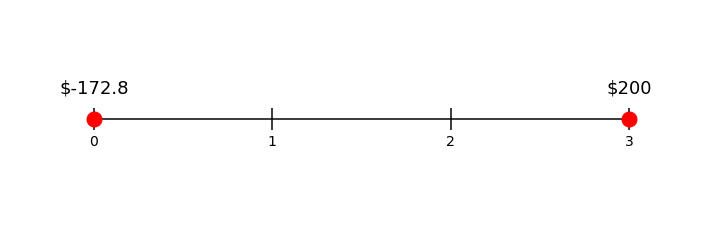

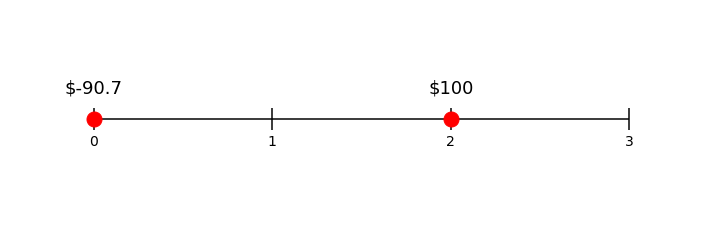

In [26]:
#Here is where present value becomes very important, when we have multiple cash flows
#What if we are offered $200 at year 3, and $100 at year 2. How much would we pay for both
#The first step is to find the PV of each of these payments
#Let's say r=.05
timelinePlot(3,[(-200/(1.05)**3,0),(200,3)])
timelinePlot(3,[(-100/(1.05)**2,0),(100,2)])

In [27]:
#Since both 172.8 and 90.7 are in present day value, we can actually add them together
#So the total PV of these two investments would then be
PV = 200/(1.05)**3+100/(1.05)**2
print(PV)

263.47046755210016


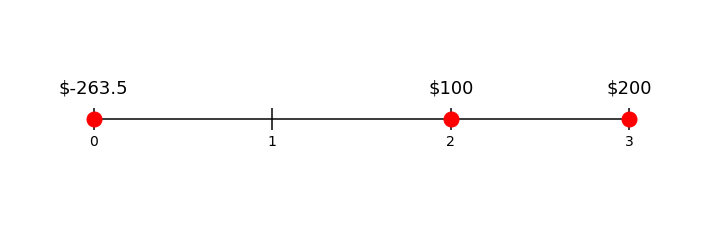

In [28]:
timelinePlot(3,[(-PV,0),(200,3),(100,2)])

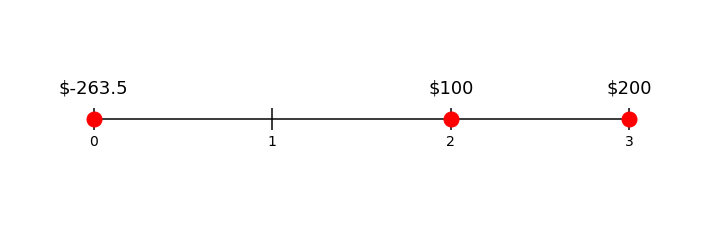

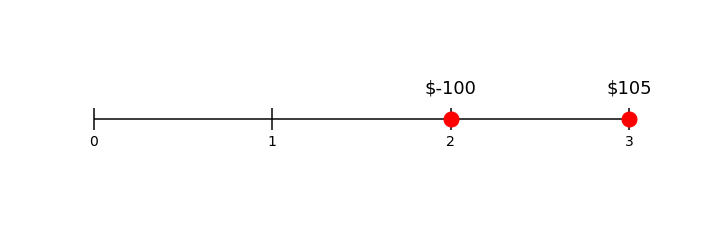

In [29]:
#Now, the final piece of this deal, at time 2 we can re-invest the $100 to the bank with r=5%.
#Let's see the two transactions
timelinePlot(3,[(-PV,0),(200,3),(100,2)])
timelinePlot(3,[(-100,2),(105,3)])

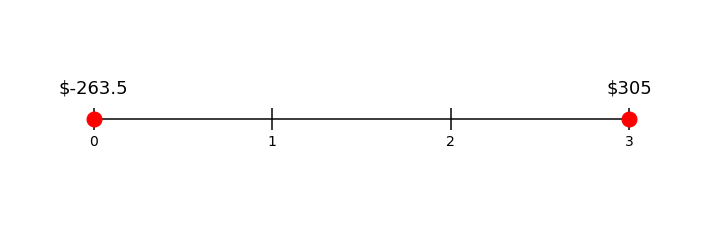

In [30]:
#When we add the cash flows together we get this
timelinePlot(3,[(-PV,0),(305,3)])

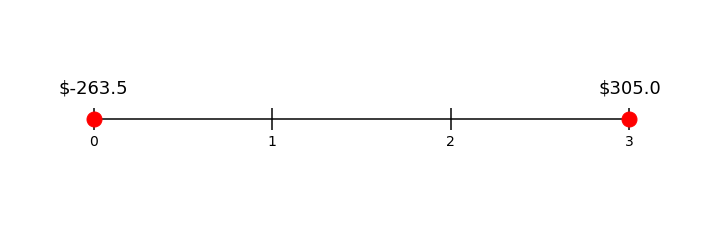

In [31]:
#Here is the best part, what if we invested that money in the bank instead of the bond/re-investing the year 2 cash
timelinePlot(3,[(-PV,0),(PV*1.05**3,3)])

In [32]:
#It's the same! That's how present value works, it makes sure our cash flows are discounted to reflect what
#Our money could have made in the time that we weren't able to invest it in something else
#Now the final step, let's see how we could can make money if we see a bond that we believe is under priced.
#Let's say we have the $300 at the end of 3 years that costs $200 to invest in when r=5%

In [33]:
#First, what is the PV?
PV = 300/1.05**3
print(PV)
#So we would normally only pay up to 259.15 to buy this bond
#But if we were able to invest in this bond and also put the extra in the bank, we'd get these cash flows

259.1512795594428


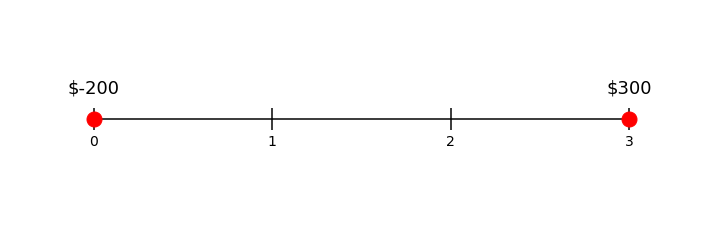

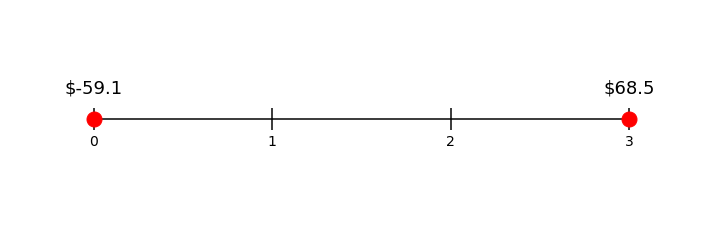

In [34]:
timelinePlot(3,[(-200,0),(300,3)])
timelinePlot(3,[(-59.15,0),(59.15*1.05**3,3)])
#So in this case, we make $368.5 total

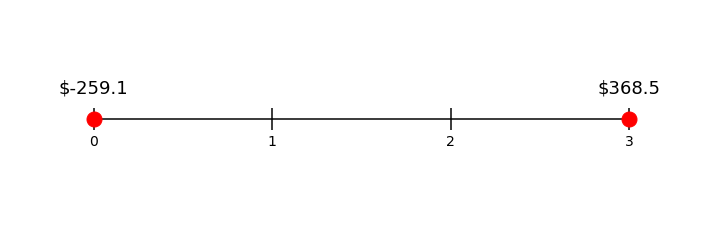

In [35]:
timelinePlot(3,[(-259.15,0),(300+59.15*1.05**3,3)])

In [36]:
#Our rate of return if we could invest in the bond and put extra in cash is....
((300+59.15*1.05**3)/259.15)**(1/3)-1
#12.44% Return

0.12447988095592843